This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

In this tutorial we will be using **keras** which is a `High-level-Api` of Tensorflow.


In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
# To make sure the system is running carefully
print(tf.__version__)

2.15.0


# Importing and Loading Dataset

For this example we will be using the infamous [Fashion Minist](https://github.com/zalandoresearch/fashion-mnist). This contains `70,000` grayscale images in `10 categories`. The images show individual articles of clothing at low resolution `(28 by 28 pixels)`.

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.


In [2]:
fashion_minist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) =  fashion_minist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

1. The train_images and train_labels arrays are the training set—the data the model uses to learn.
2. The model is tested against the test set, the test_images, and test_labels arrays.

The images are `28x28` NumPy arrays, with pixel values ranging from `0 to 255` . The labels are an array of integers, ranging from `0 to 9`. These correspond to the class of clothing the image represents:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Data Exploration
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

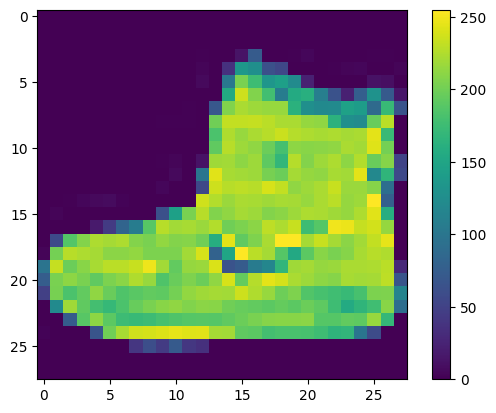

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [10]:
#Data normalization
train_images = train_images/255.0
test_images = test_images/255.0

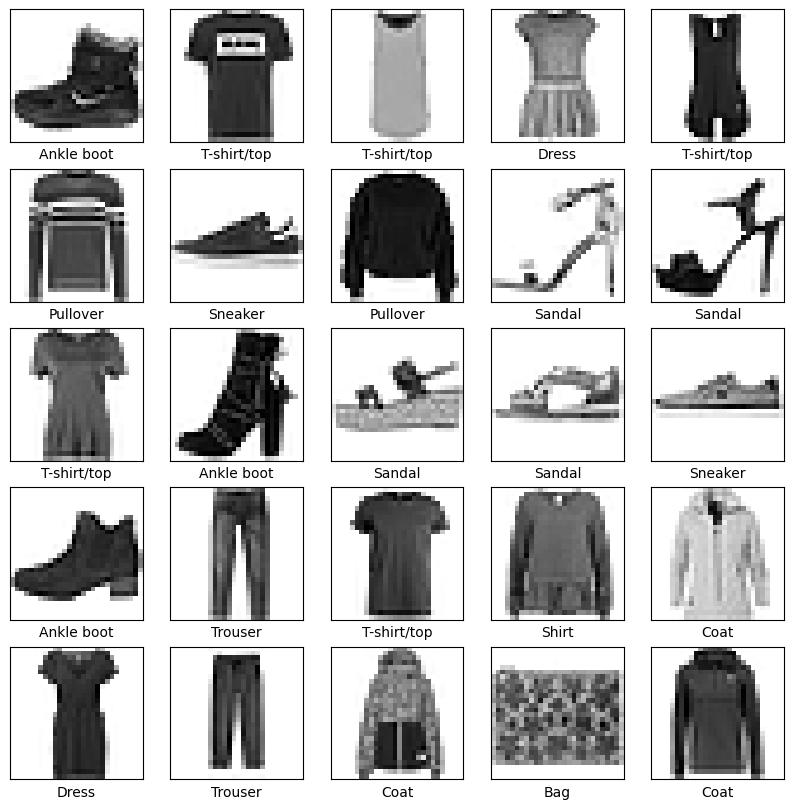

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building a Model

Building the neural network requires configuring the layers of the model, then compiling the model.

## Set up the layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers`.Flatten, transforms the format of the images from a two-dimensional array `(of 28 by 28 pixels)` to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

[Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.

[Loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

[Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the test_labels array.

In [16]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5014 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3787 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3394 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3148 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2999 - accuracy: 0.8882
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2846 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2704 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2585 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2510 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

## Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print('\n Test Accuracy:', test_acc)

313/313 - 2s - loss: 0.3423 - accuracy: 0.8793 - 2s/epoch - 5ms/step

 Test Accuracy: 0.8792999982833862


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

[Demostrate Overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)

[Strategies To Prevent OverFitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

## Make Predictions

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.



In [18]:
probablityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [20]:
predictions = probablityModel.predict(test_images)

313/313 [==============================] - 2s 5ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [21]:
predictions[0]

array([4.7661001e-06, 2.0506148e-08, 1.2087506e-07, 2.1400630e-09,
       5.8102223e-08, 7.1914232e-04, 5.3343892e-06, 6.6665128e-02,
       2.9147895e-06, 9.3260247e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:





In [22]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [24]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

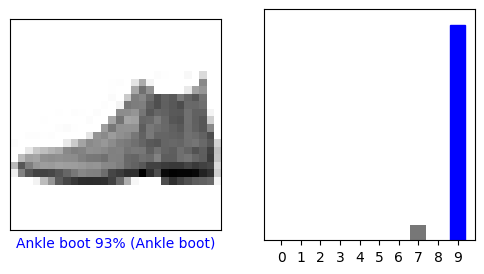

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

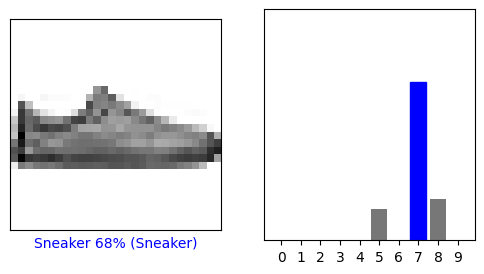

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

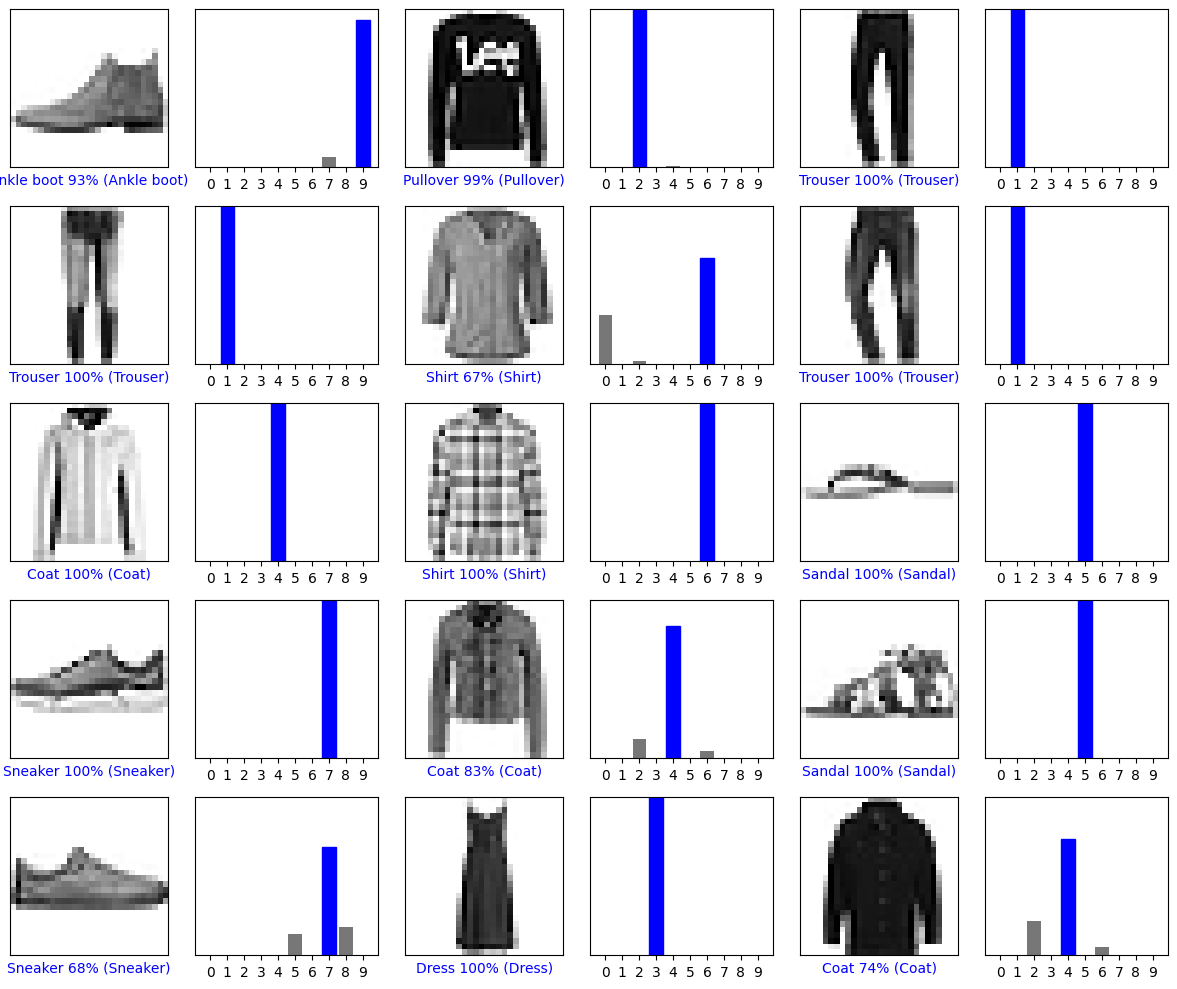

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()